In [5]:
# All imports
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from probability import Probability
from music21 import converter
import entropy
import songs
import util

COLORS = ['blue', 'black', 'red', 'magenta', 'green', 'yellow', 'purple', 'gray', 'orange', 'crimson', 'blueviolet', 'hotpink']
import numpy as np

def s(name):
    filename = 'melody/' + name + '.mid'
    song = converter.parse(filename)
    parts = list(song.parts)
    size = map(lambda p: len(p.flat.notesAndRests), parts)
#     print('Parts:',list(size))
    return song.parts

def t(part):
    deltat = list(map(lambda e: e.duration.quarterLength, part.flat.notesAndRests))
    for i in range(len(deltat)):
        if i:
            deltat[i] = deltat[i-1] + deltat[i]
    return deltat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


dt: 0.25


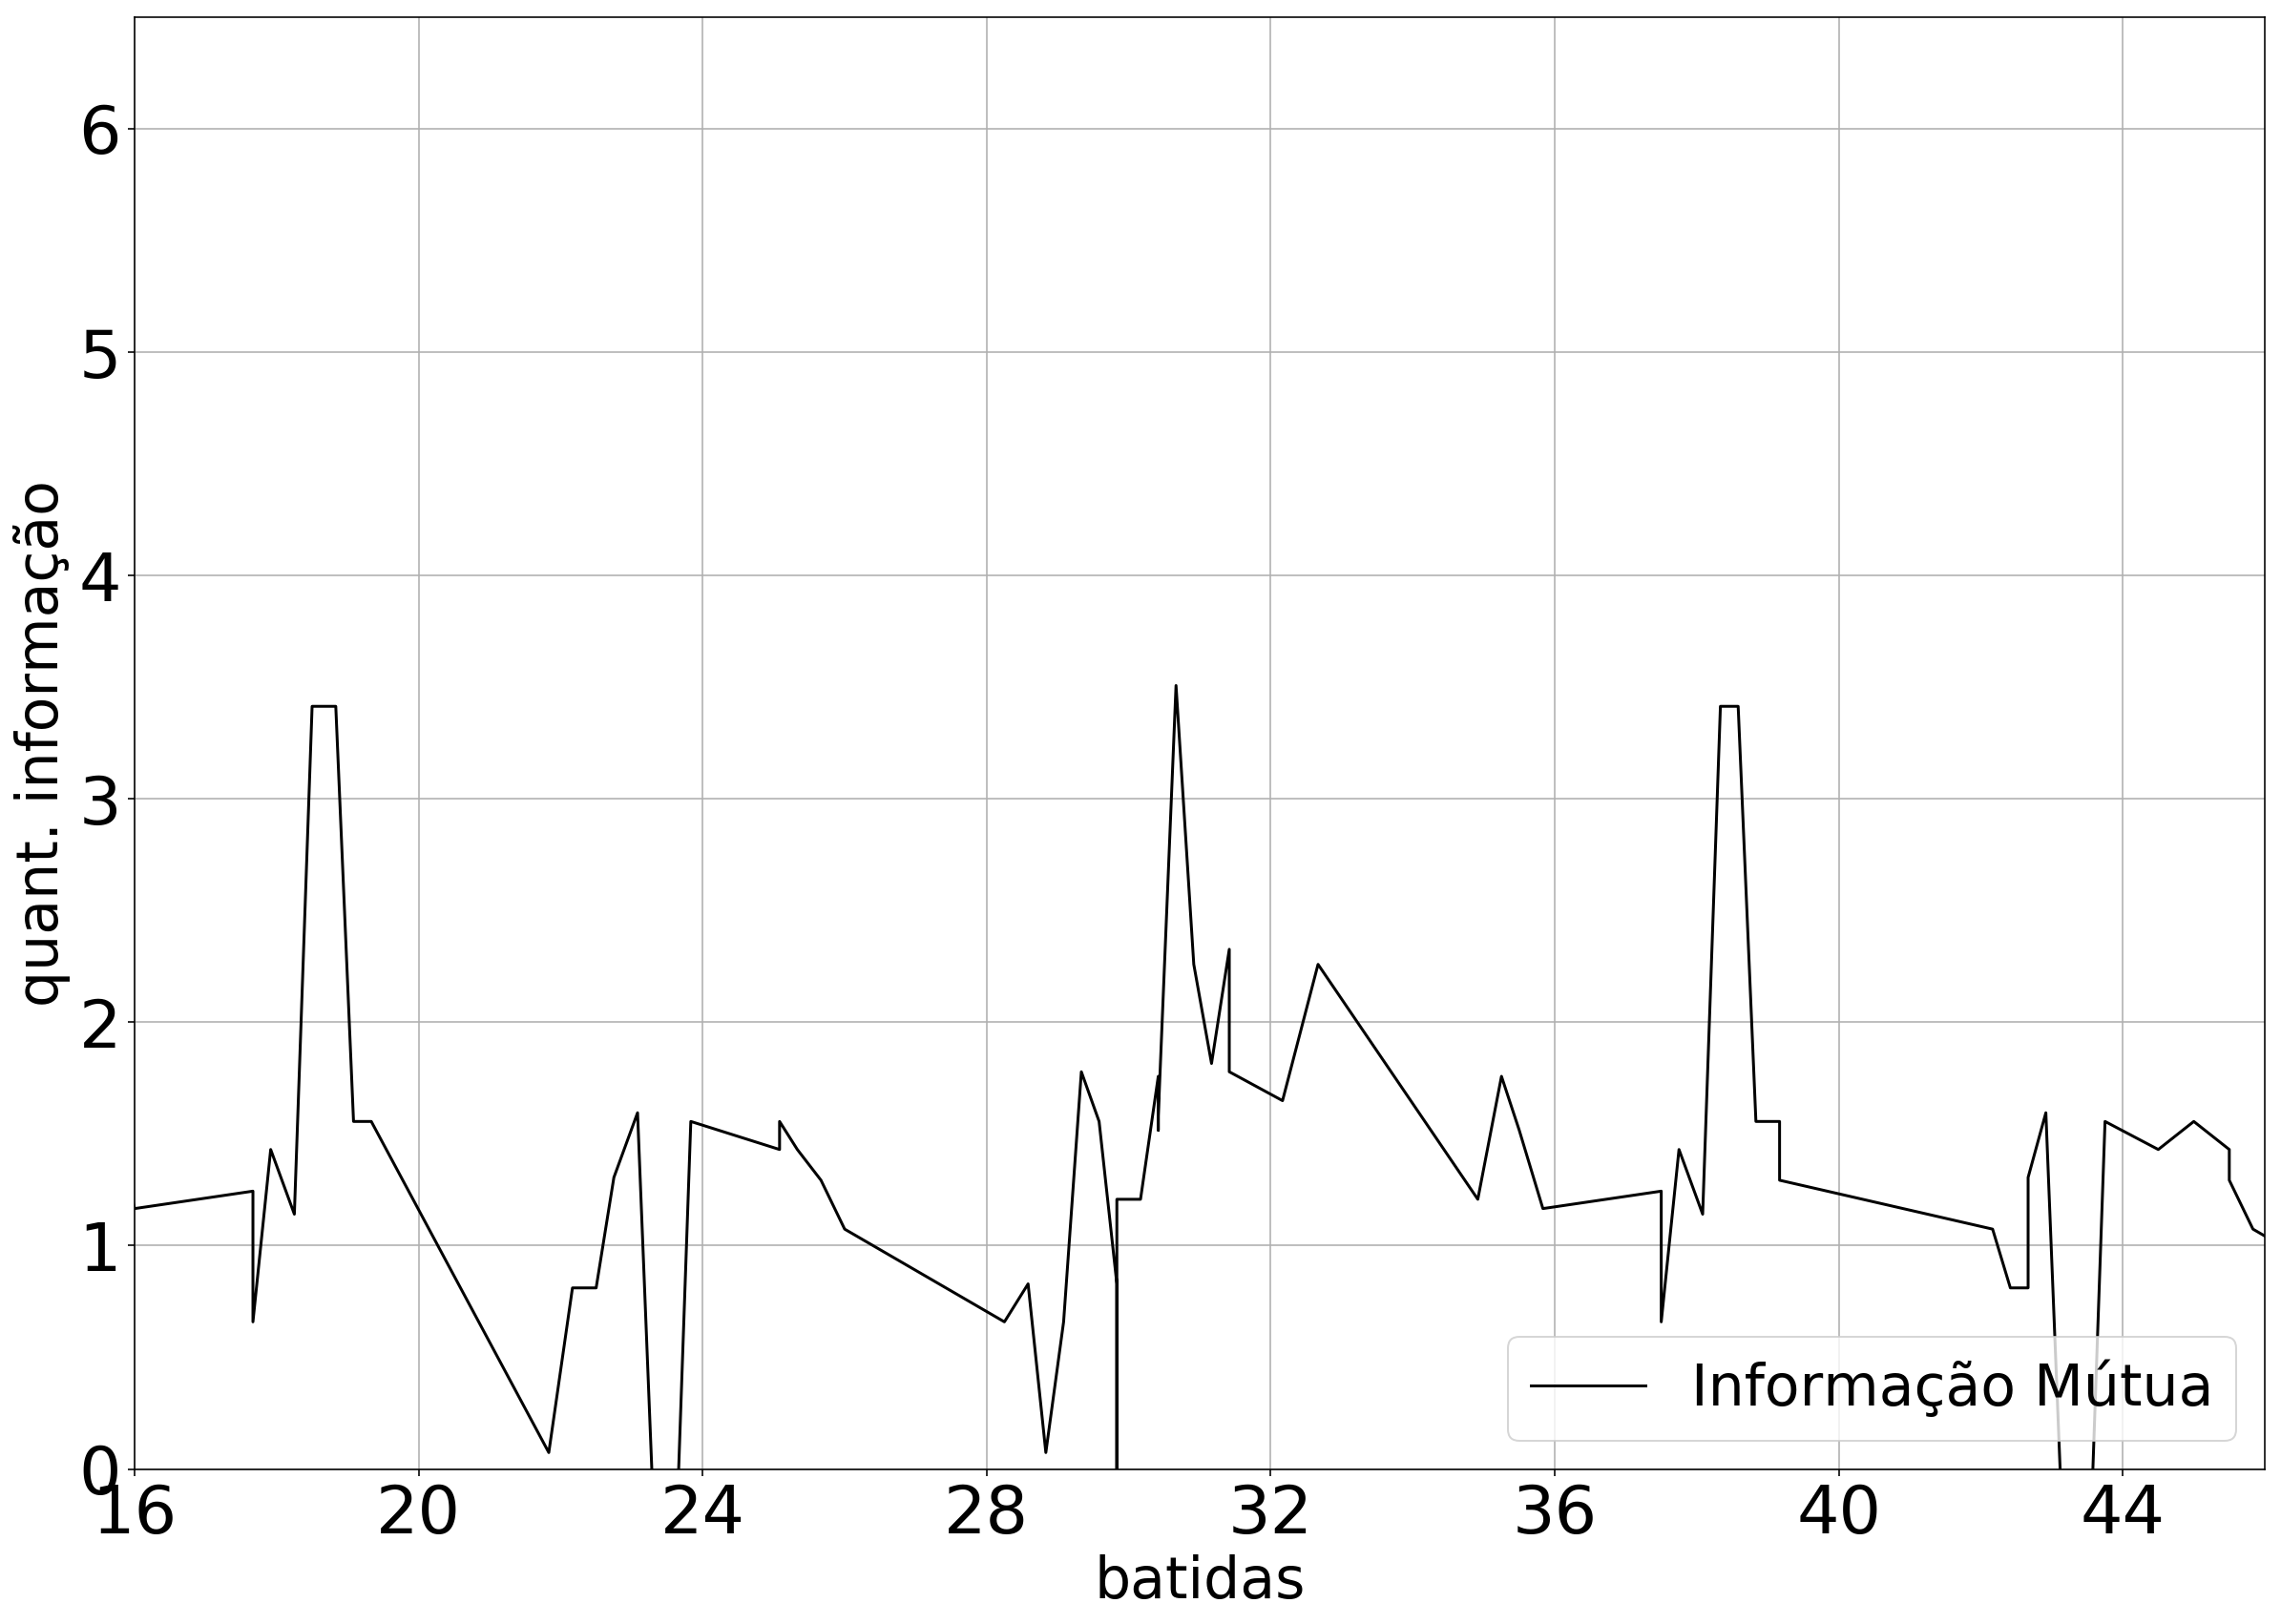

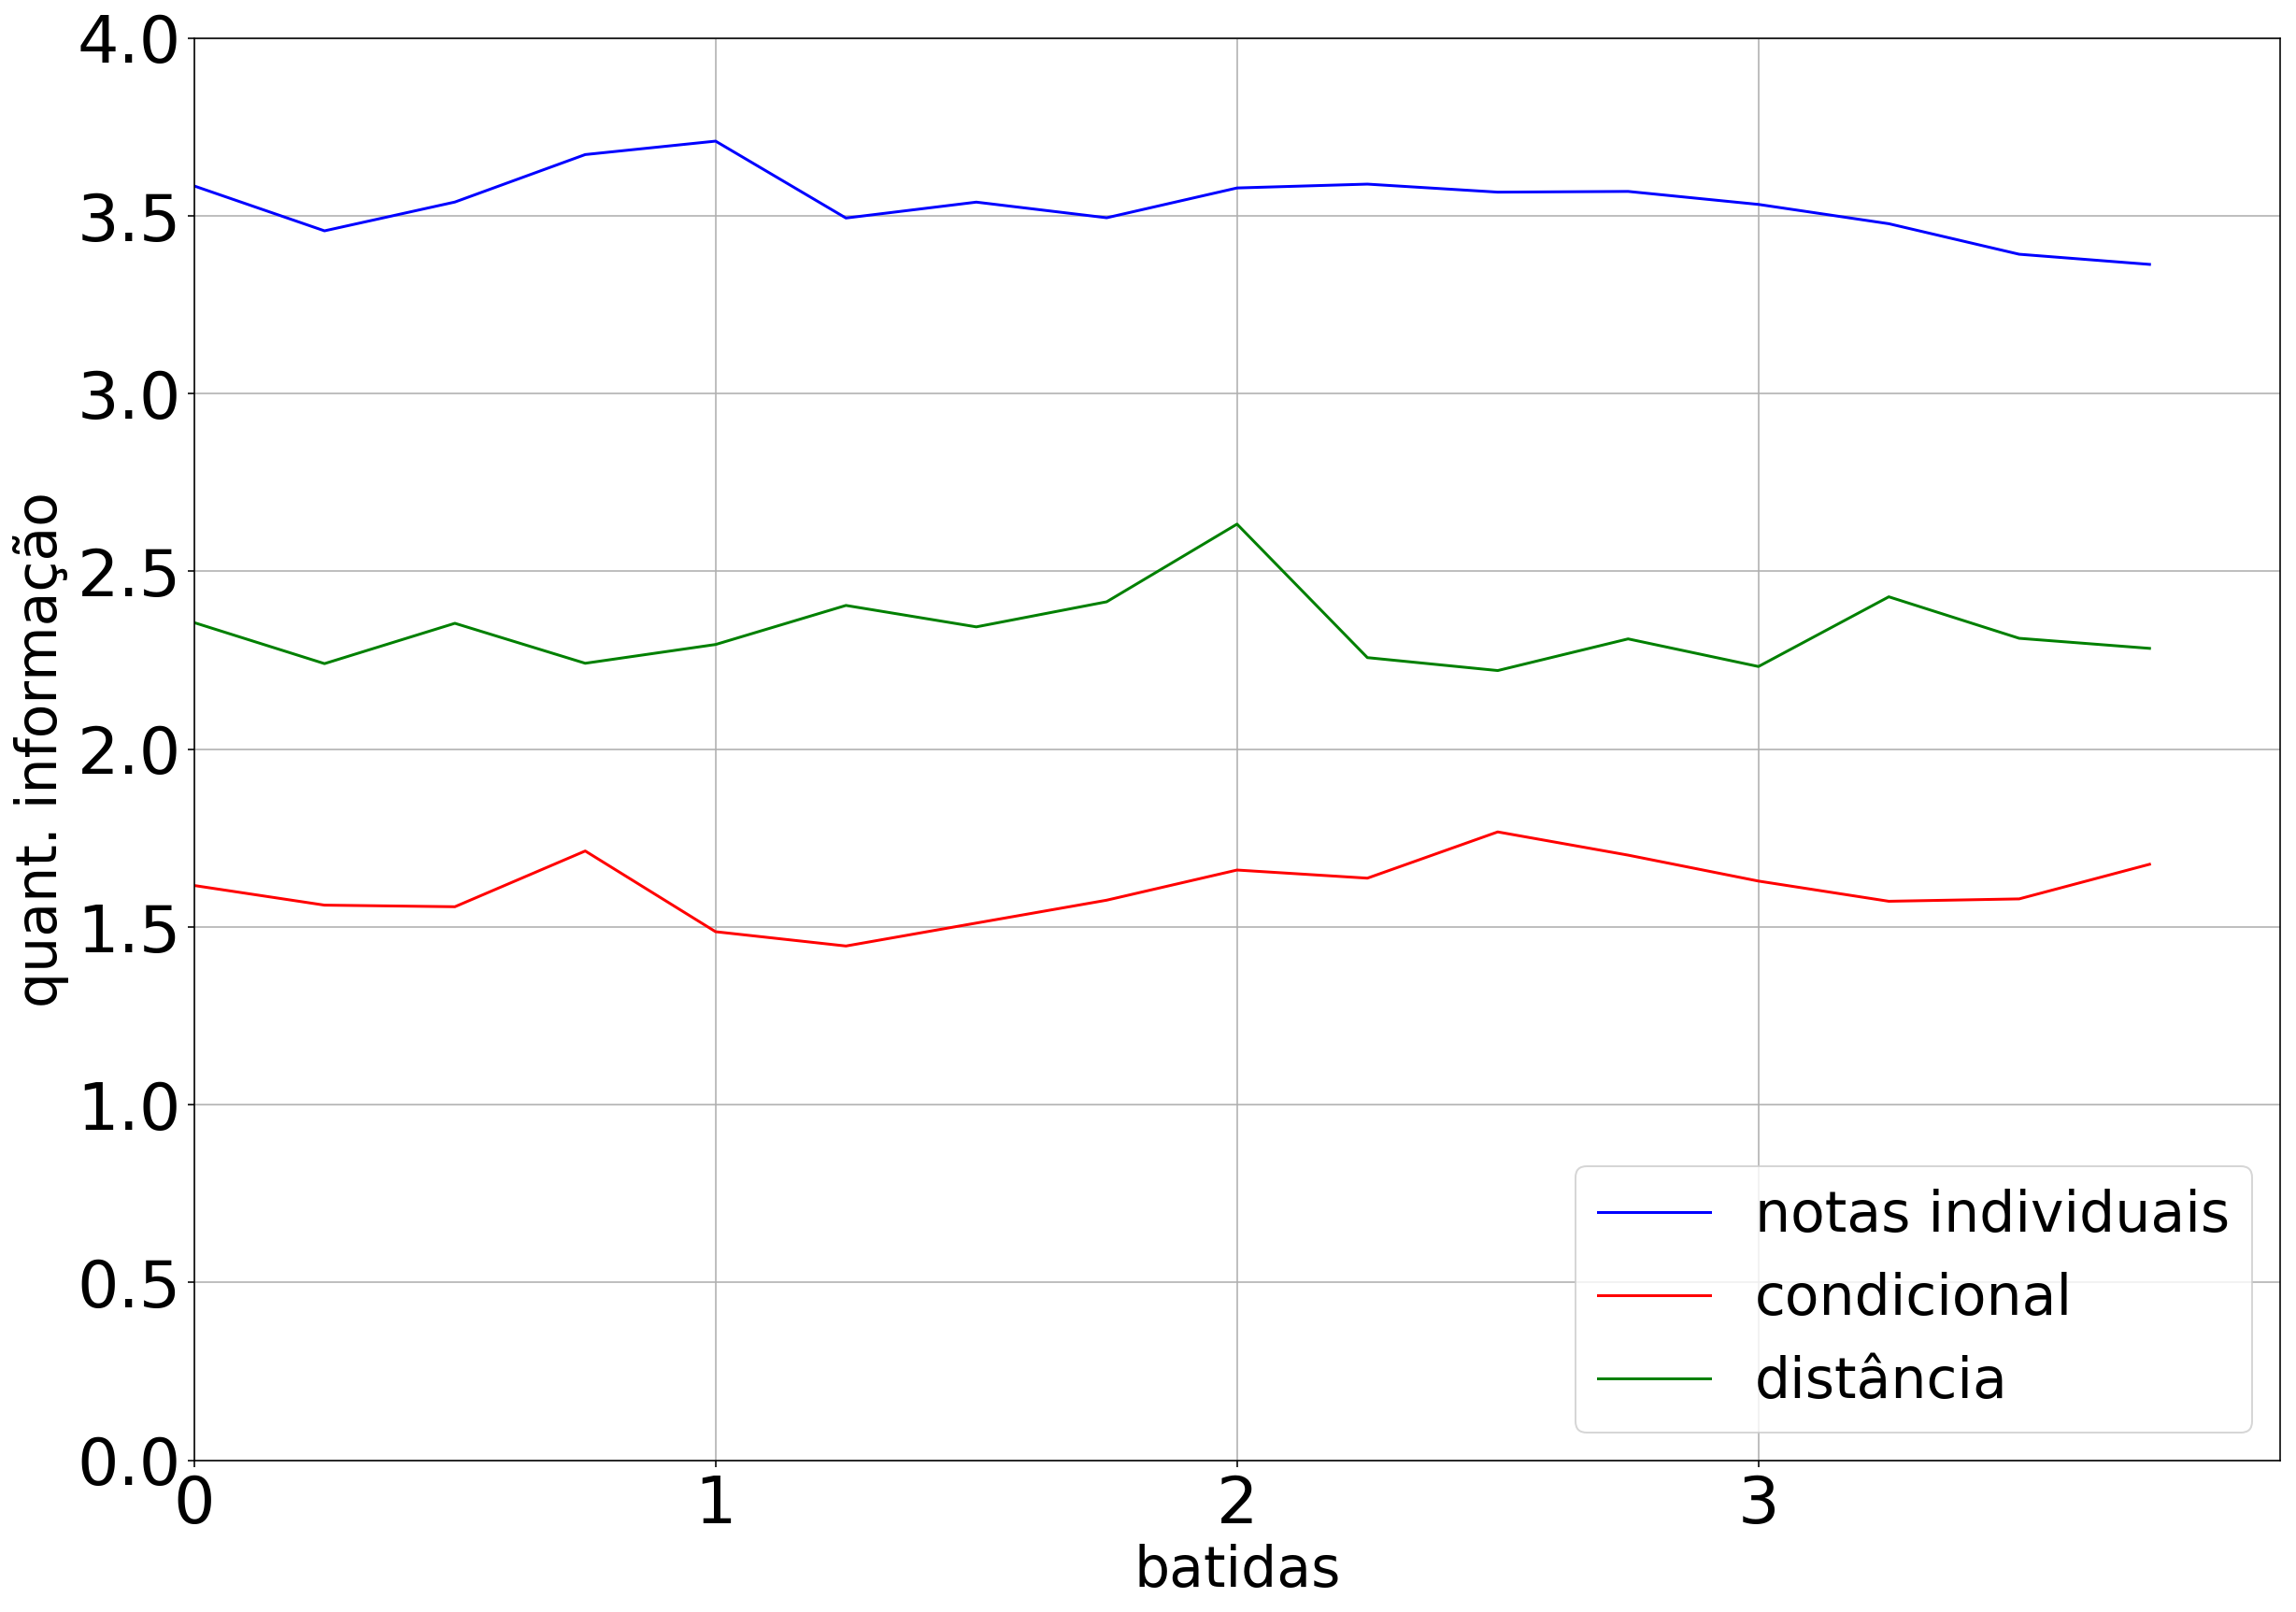

In [13]:
#PAGANINI
import operator
bach = s('wave')
x = t(bach[0])
# print(x)
key = bach.analyze('key')
tonic = key.tonic.name
mode = key.mode

p = Probability()
p.addSong(bach)
h = entropy.calculate(bach[0], p, tonic, mode)

min_x = 16
max_x = 46
points = len(x)
font_size = 30

plt.figure(figsize=(20, 14))
plt.xlabel('batidas', fontsize = font_size)
plt.ylabel('quant. informação', fontsize = font_size)
# plt.plot(x[:points], h[util.NOTE][0][:points], label='notas individuais')
# plt.plot(x[:points], h[util.NOTE][1][:points], color='red', label='condicional')

# plt.plot(x[:points], h[util.DELTA][1][:points], color='green', label='distância')
# plt.plot(x[:200], h[util.DURATION][:200], color='green', label='duração')

i = list(map(operator.sub, h[util.NOTE][0][:points], h[util.NOTE][1][:points]))
plt.plot(x[:points], i[:points], color='black', label='Informação Mútua')

plt.legend(fontsize = font_size, loc='lower right')

plt.axis((min_x, max_x,0, 6.5))
ax = plt.gca()                                        
minor_ticks = np.arange(min_x, max_x, 4)                                                    
ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both') 
# ax.grid(markevery=7)
# plt.show()
plt.savefig('wave2.pdf')

arrayT = list(map(lambda e: e.duration.quarterLength, bach[0].flat.notesAndRests))
dt = min(i for i in arrayT if i > 0)
print('dt:', dt)

compass0 = [0] * int(4 / dt)
compass1 = [0] * int(4 / dt)
compass2 = [0] * int(4 / dt)

it = 0
total = 1
for i in range(len(arrayT)):
    quant = int(arrayT[i] / dt)
    while quant:
        compass0[it] += h[util.NOTE][0][i]
        compass1[it] += h[util.NOTE][1][i]
        compass2[it] += h[util.DELTA][1][i]
#         print(compass)
        quant -= 1
        it += 1
        if it >= len(compass0):
            it = 0
            total += 1
compass0 = list(map(lambda x: x / total, compass0))
compass1 = list(map(lambda x: x / total, compass1))
compass2 = list(map(lambda x: x / total, compass2))

# print(compass)
                       
x2 = np.arange(0, 4, dt)        

plt.figure(figsize=(20, 14))
plt.xlabel('batidas', fontsize = font_size)
plt.ylabel('quant. informação', fontsize = font_size)
# plt.plot(x[:points], h[util.NOTE][0][:points], label='notas individuais')
plt.plot(x2, compass0, color='blue', label='notas individuais')
plt.plot(x2, compass1, color='red', label='condicional')
plt.plot(x2, compass2, color='green', label='distância')
# plt.plot(x[:points], h[util.DELTA][1][:points], color='green', label='distância')
# plt.plot(x[:200], h[util.DURATION][:200], color='green', label='duração')
plt.legend(fontsize = font_size, loc='lower right')

plt.axis((0, 4, 0, 4))
ax = plt.gca()                                        
minor_ticks = np.arange(0, 4, 4*dt)                                             
ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both') 
# ax.grid(markevery=7)
# plt.show()
plt.savefig('compass_wave.pdf')


dt: 1/12


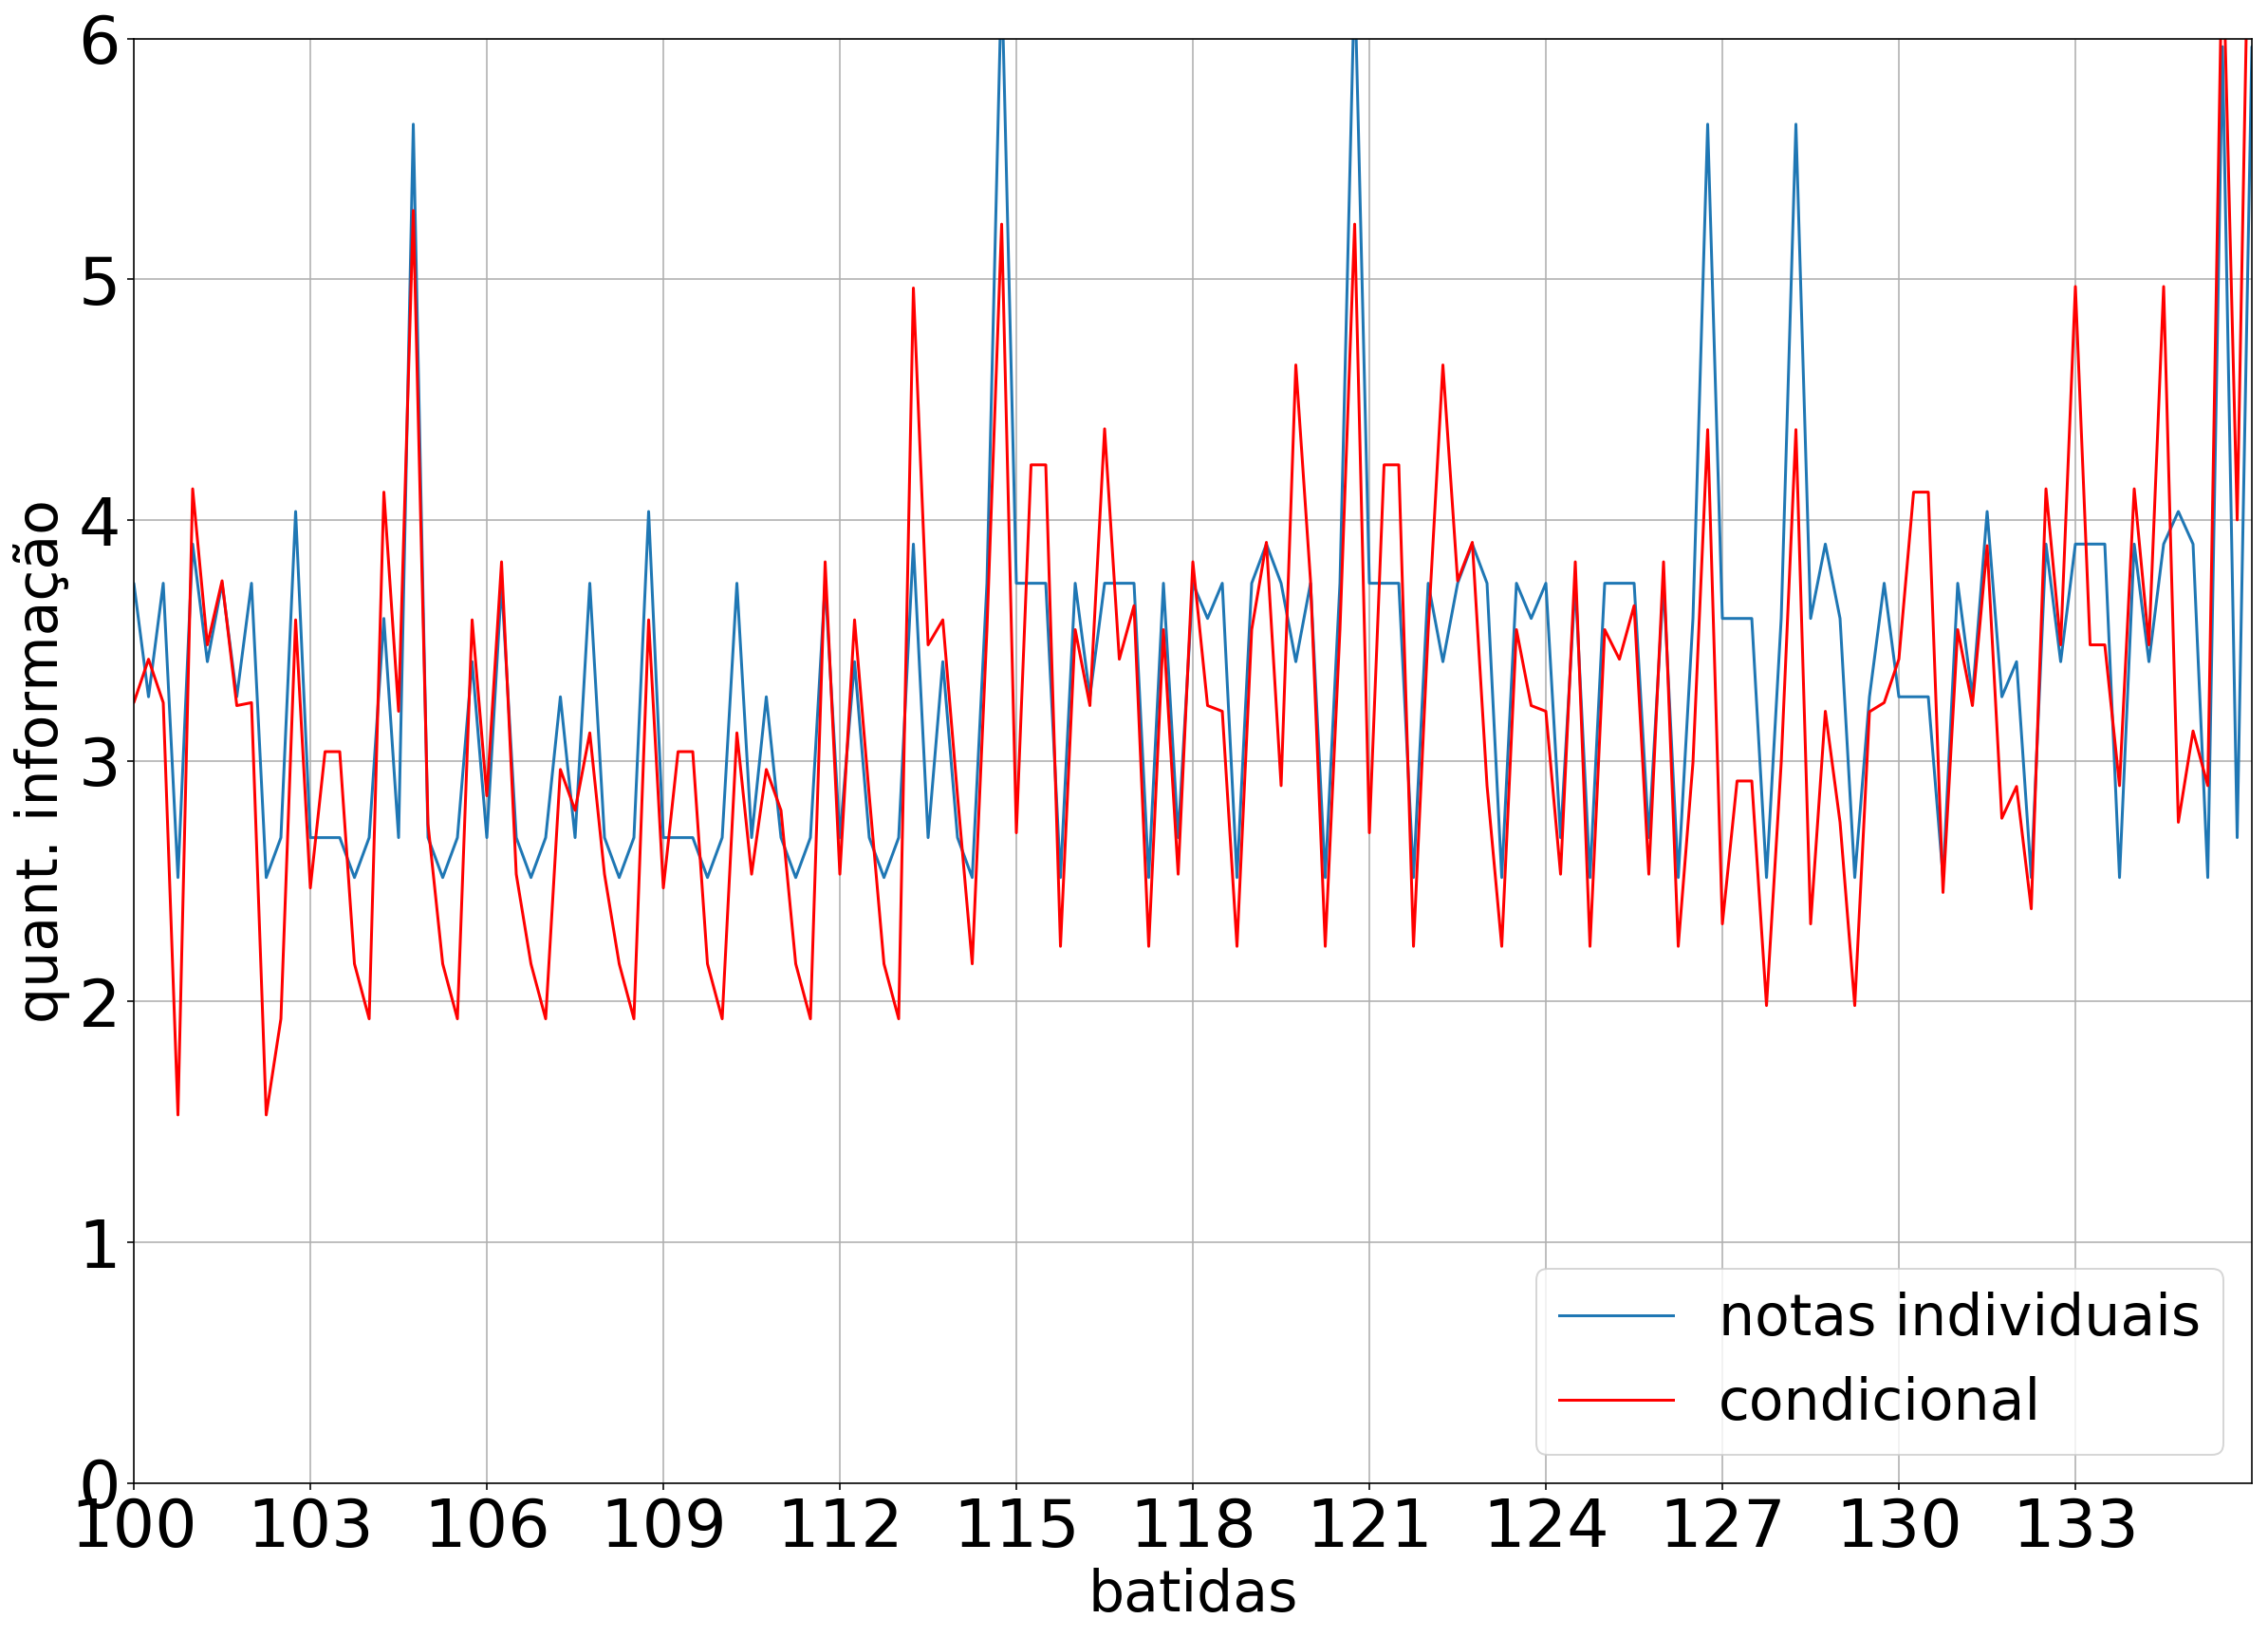

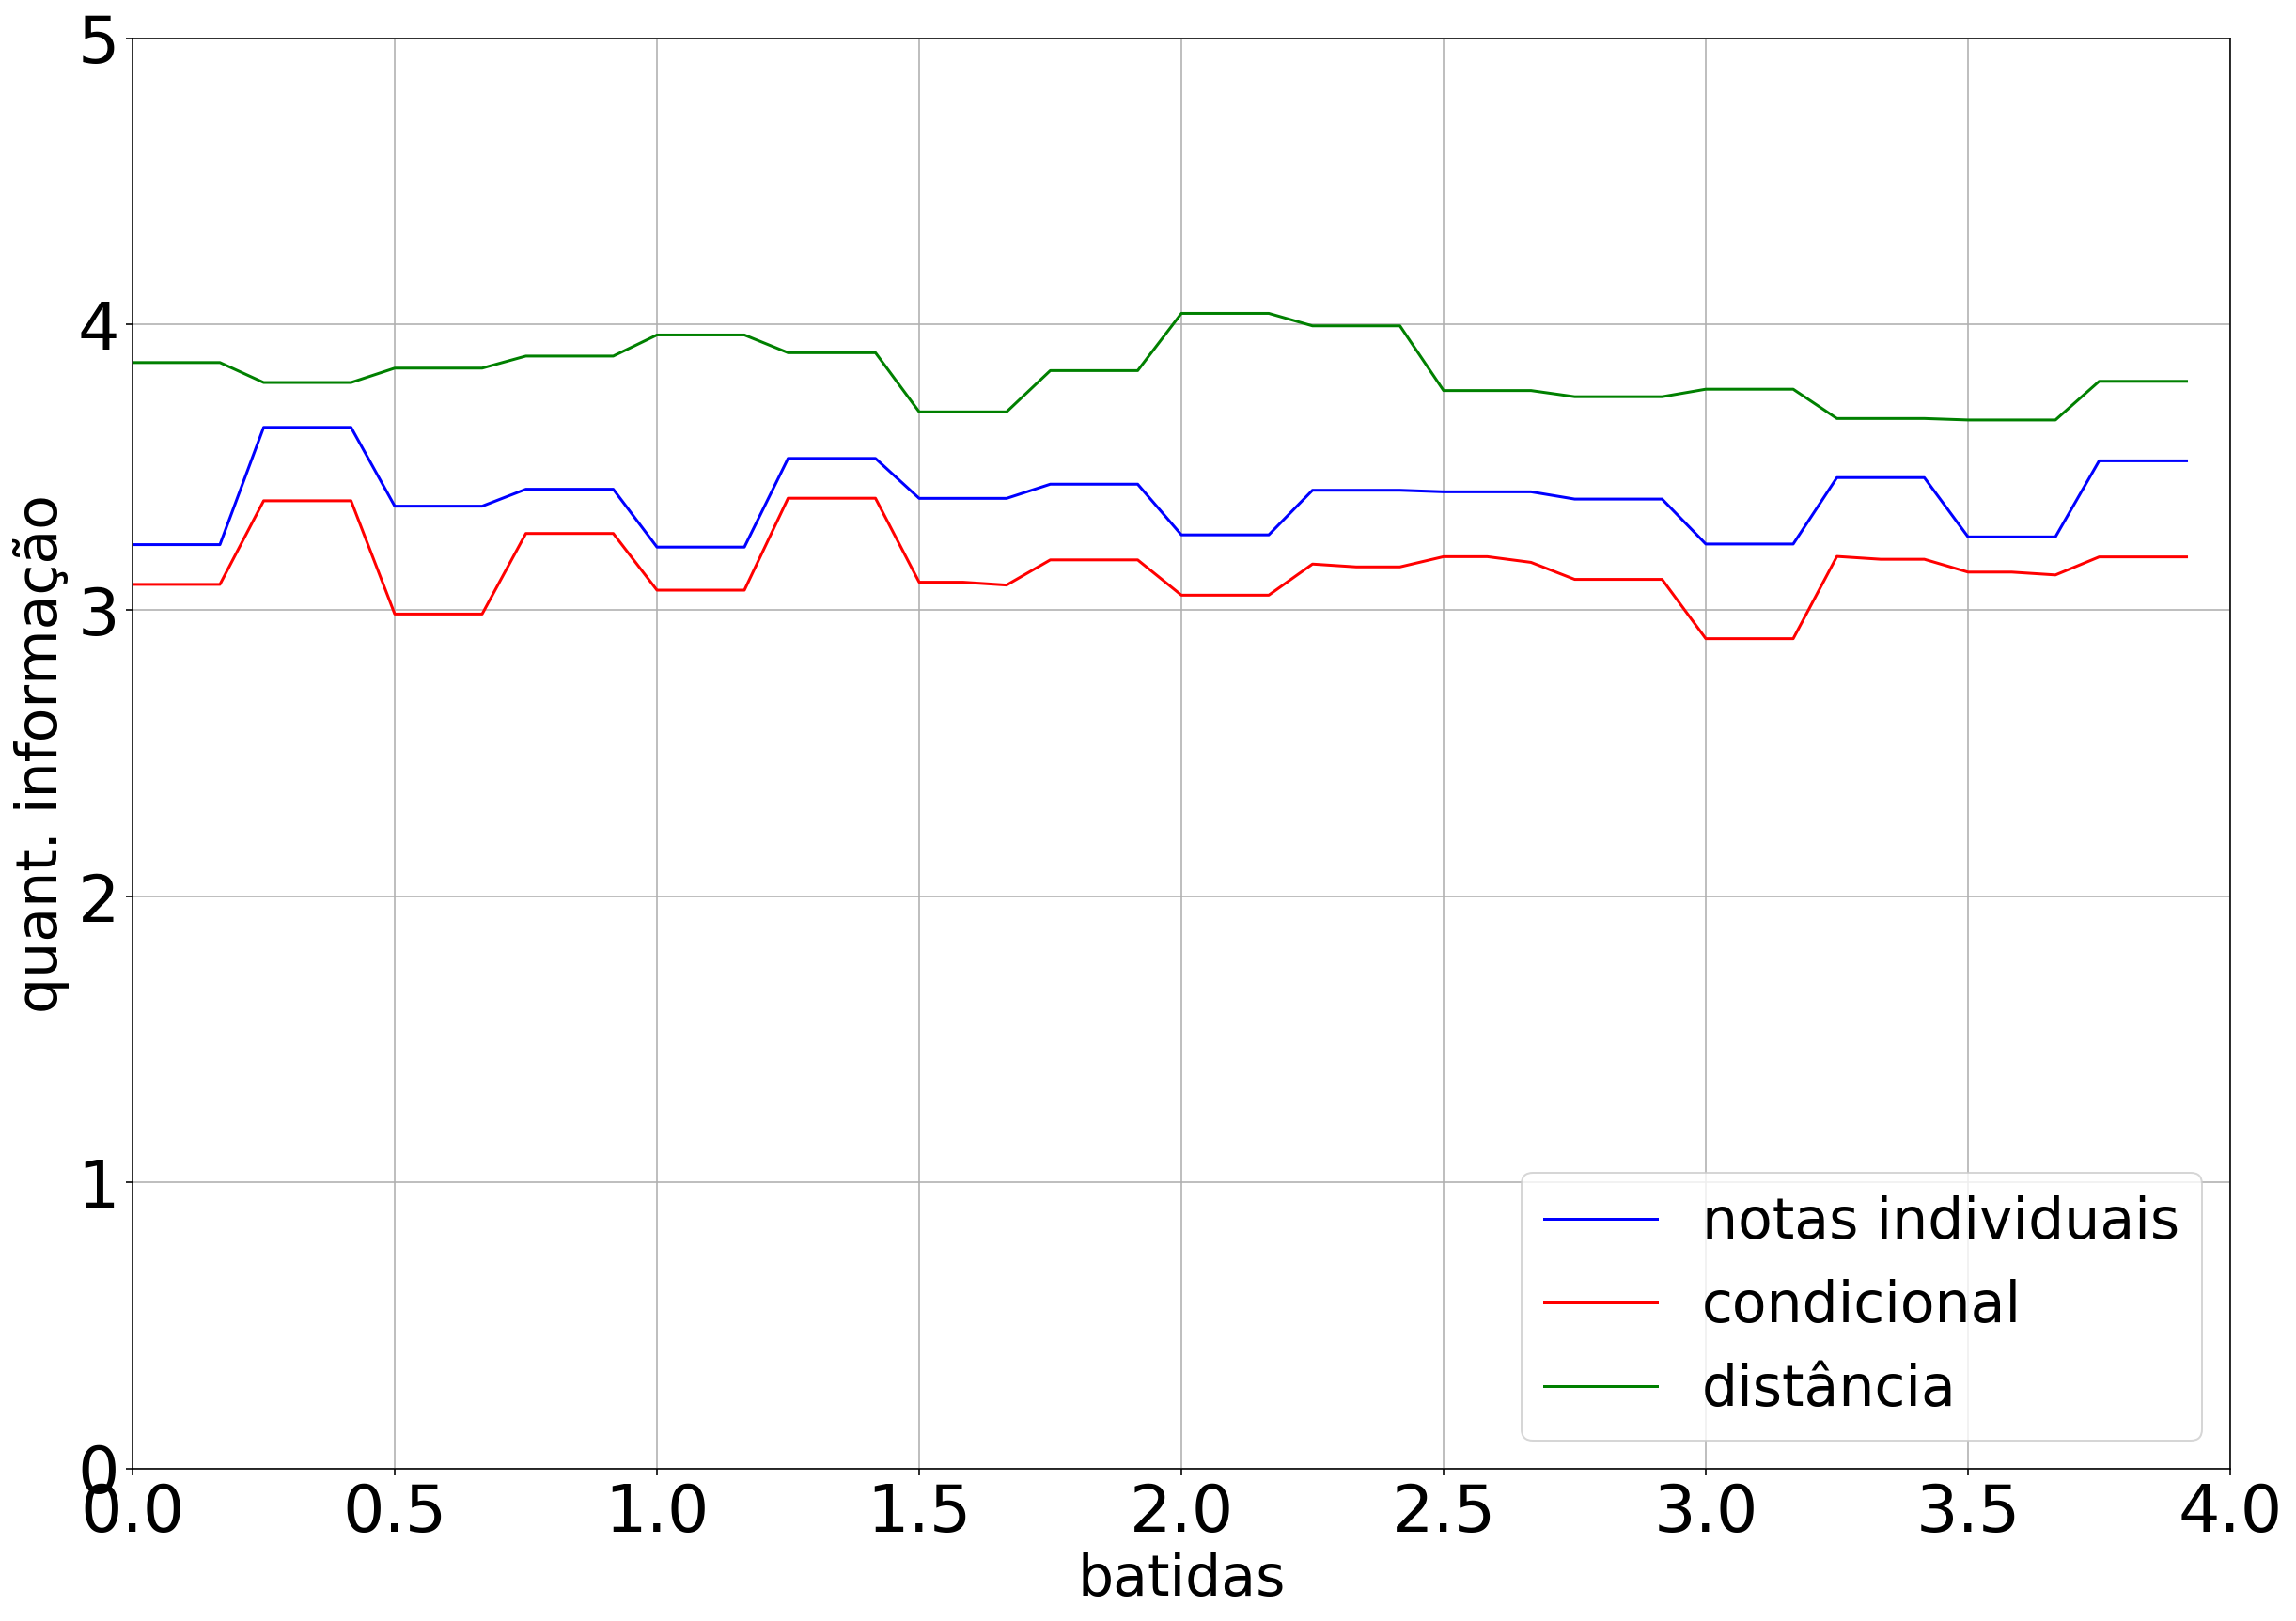

In [2]:
#PAGANINI

bach = s('caprice_2')
x = t(bach[0])
# print(x)
key = bach.analyze('key')
tonic = key.tonic.name
mode = key.mode

p = Probability()
p.addSong(bach)
h = entropy.calculate(bach[0], p, tonic, mode)

min_x = 100
max_x = 136
points = len(x)
font_size = 30

plt.figure(figsize=(20, 14))
plt.xlabel('batidas', fontsize = font_size)
plt.ylabel('quant. informação', fontsize = font_size)
plt.plot(x[:points], h[util.NOTE][0][:points], label='notas individuais')
plt.plot(x[:points], h[util.NOTE][1][:points], color='red', label='condicional')
# plt.plot(x[:points], h[util.DELTA][1][:points], color='green', label='distância')
# plt.plot(x[:200], h[util.DURATION][:200], color='green', label='duração')


# i = list(map(operator.sub, h[util.NOTE][0][:points], h[util.NOTE][1][:points]))
# plt.plot(x[:points], i[:points], color='black', label='Informação Mútua')


plt.legend(fontsize = font_size, loc='lower right')

plt.axis((min_x, max_x,0, 6))
ax = plt.gca()                                        
minor_ticks = np.arange(min_x, max_x, 3)                                                    
ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both') 
# ax.grid(markevery=7)
# plt.show()
plt.savefig('paga2.pdf')


arrayT = list(map(lambda e: e.duration.quarterLength, bach[0].flat.notesAndRests))
dt = min(i for i in arrayT if i > 0)
print('dt:', dt)

compass0 = [0] * int(4 / dt)
compass1 = [0] * int(4 / dt)
compass2 = [0] * int(4 / dt)

it = 0
total = 1
for i in range(len(arrayT)):
    quant = int(arrayT[i] / dt)
    while quant:
#         compass[it] += h[util.NOTE][0][i]
        compass0[it] += h[util.NOTE][0][i]
        compass1[it] += h[util.NOTE][1][i]
        compass2[it] += h[util.DELTA][1][i]
#         print(compass)
        quant -= 1
        it += 1
        if it >= len(compass0):
            it = 0
            total += 1
# compass = list(map(lambda x: x / total, compass))
compass0 = list(map(lambda x: x / total, compass0))
compass1 = list(map(lambda x: x / total, compass1))
compass2 = list(map(lambda x: x / total, compass2))

# print(compass)
                       
x2 = np.arange(0, 4, dt)        

plt.figure(figsize=(20, 14))
plt.xlabel('batidas', fontsize = font_size)
plt.ylabel('quant. informação', fontsize = font_size)
# plt.plot(x[:points], h[util.NOTE][0][:points], label='notas individuais')
# plt.plot(x2, compass, color='red', label='condicional')
plt.plot(x2, compass0, color='blue', label='notas individuais')
plt.plot(x2, compass1, color='red', label='condicional')
plt.plot(x2, compass2, color='green', label='distância')
# plt.plot(x[:points], h[util.DELTA][1][:points], color='green', label='distância')
# plt.plot(x[:200], h[util.DURATION][:200], color='green', label='duração')
plt.legend(fontsize = font_size, loc='lower right')

plt.axis((0, 4,0, 5))
ax = plt.gca()                                        
# minor_ticks = np.arange(0, 3, 3*dt)                                             
# ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both') 
# ax.grid(markevery=7)
# plt.show()
plt.savefig('paga3.pdf')


sonata_11a :
note: 3.07
note: 2.74
delta: 2.89

sonata_11b :
note: 3.21
note: 2.96
delta: 3.22

alla_turca :
note: 3.21
note: 2.85
delta: 2.74

krebsgang :
note: 2.72
note: 2.71
delta: 3.14

eine_kleine_nachtmusik :
note: 3.22
note: 2.84
delta: 2.56

caprice_1 :
note: 3.0
note: 2.62
delta: 1.56

caprice_2 :
note: 3.42
note: 3.34
delta: 3.83

caprice_5 :
note: 3.31
note: 3.09
delta: 3.12

caprice_16 :
note: 3.32
note: 3.11
delta: 3.68

caprice_24 :
note: 3.3
note: 3.08
delta: 3.68

waltze_70_2 :
note: 3.21
note: 3.1
delta: 2.9

nocturne_37_2 :
note: 3.6
note: 3.32
delta: 3.57

fantasie_49 :
note: 3.45
note: 3.34
delta: 4.57

nocturne_48_1 :
note: 3.35
note: 2.9
delta: 3.09

maple_leaf_rag :
note: 3.06
note: 3.0
delta: 3.35

peacherine_rag :
note: 2.95
note: 2.47
delta: 1.44

the_easy_winners :
note: 3.38
note: 3.06
delta: 3.15

a_breeze_from_alabama :
note: 3.32
note: 3.13
delta: 3.1

black_beauty :
note: 3.37
note: 3.31
delta: 4.3

mood_indigo :
note: 3.1
note: 3.29
delta: 3.94

in_a_s

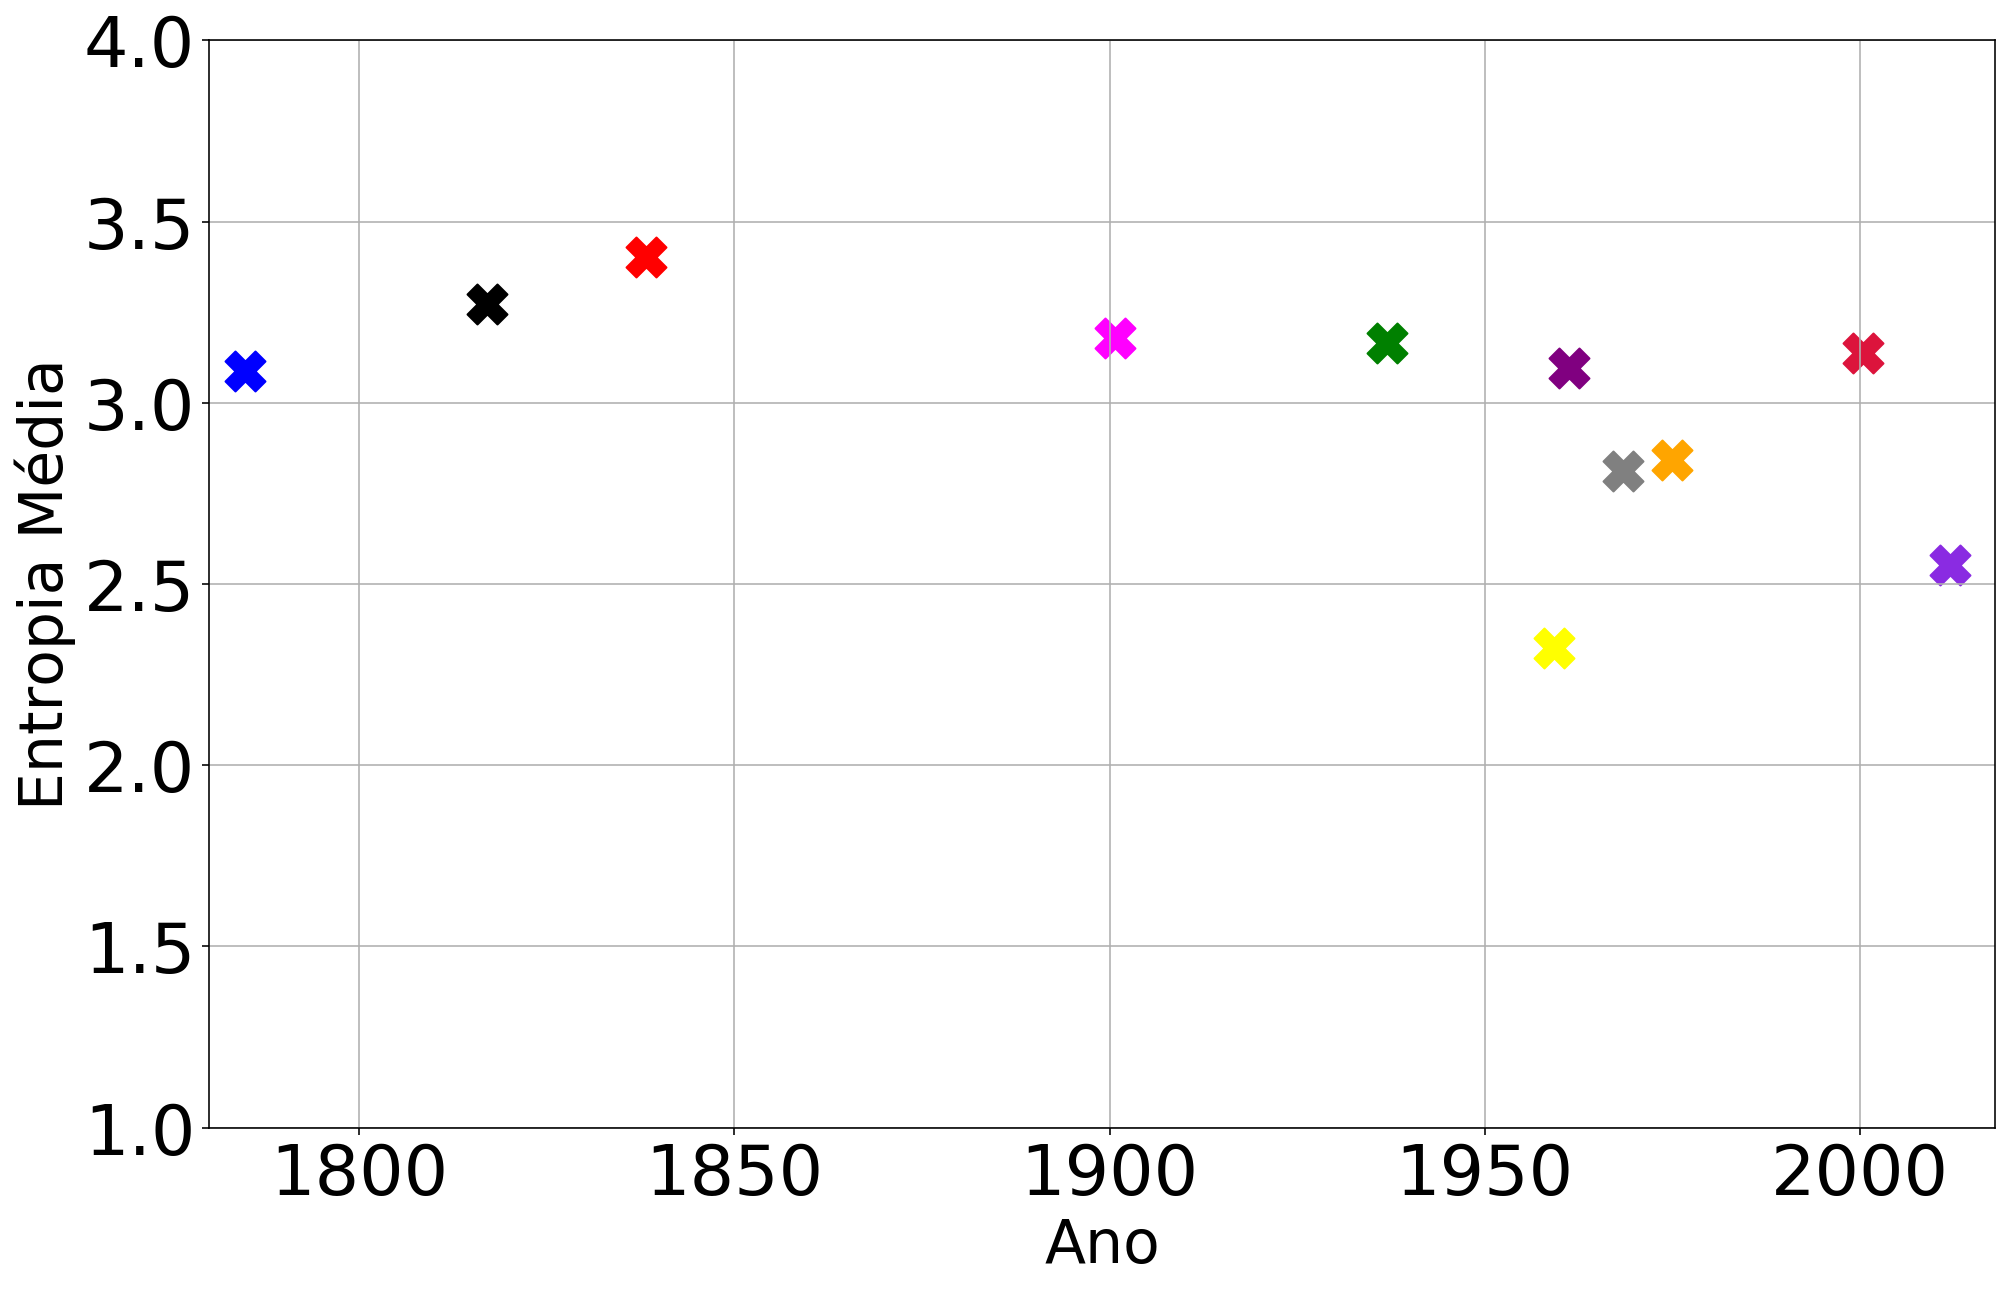

In [16]:
count = 0
plt.figure(figsize=(20, 10))

min_x = 1750
max_x = 2018
# points = len(x)
font_size = 30
ax = plt.gca()
box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
minor_ticks = np.arange(min_x, max_x, 50)                                                    
ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both')
plt.axis((1780,max_x,1,4))
# plt.figure()
for artist in songs.ARTISTS:
    x = []
    y0 = []
    y1 = []
    mean = 0
    year_mean = 0
    num = 0
    for song in songs.LIST[artist]:
        num+=1
        parts = s(song.name)
        p = Probability()
        p.addSong(parts)
        x.append(song.year)
#         x.append(song.year-base_year)
        h = entropy.mean(p)
        print(song.name, ":")
        print('note:', str(round(h[util.NOTE][0], 2)))
        print('note:', str(round(h[util.NOTE][1], 2)))
        print('delta:', str(round(h[util.DELTA][1], 2)))
        print()
        y0.append(h[util.NOTE][0])
        mean += h[util.NOTE][0]
        year_mean += song.year
        y1.append(h[util.DELTA][1])

#     x1,x2,y1,y2 = plt.axis()
#     plt.title(artist)
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.plot(x, y0, '.')
#     plt.plot(x, y1, '.', color=COLORS[count])
    mean /= num
    year_mean /= num
    plt.xlabel('Ano', fontsize = font_size)
    plt.ylabel('Entropia Média', fontsize = font_size)
#     plt.scatter(x, y0, color=COLORS[count], s=200, label=artist)
    plt.scatter(year_mean, mean, marker='X', color=COLORS[count], s=400)
#     plt.legend(fontsize = font_size, loc='lower right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 1.5), fontsize = font_size)

                      

    # Put a legend to the right of the current axis
    
    plt.savefig(str(count) + '.jpg')
    count+=1
#     if count == 10: break
#     break

# plt.show()
        

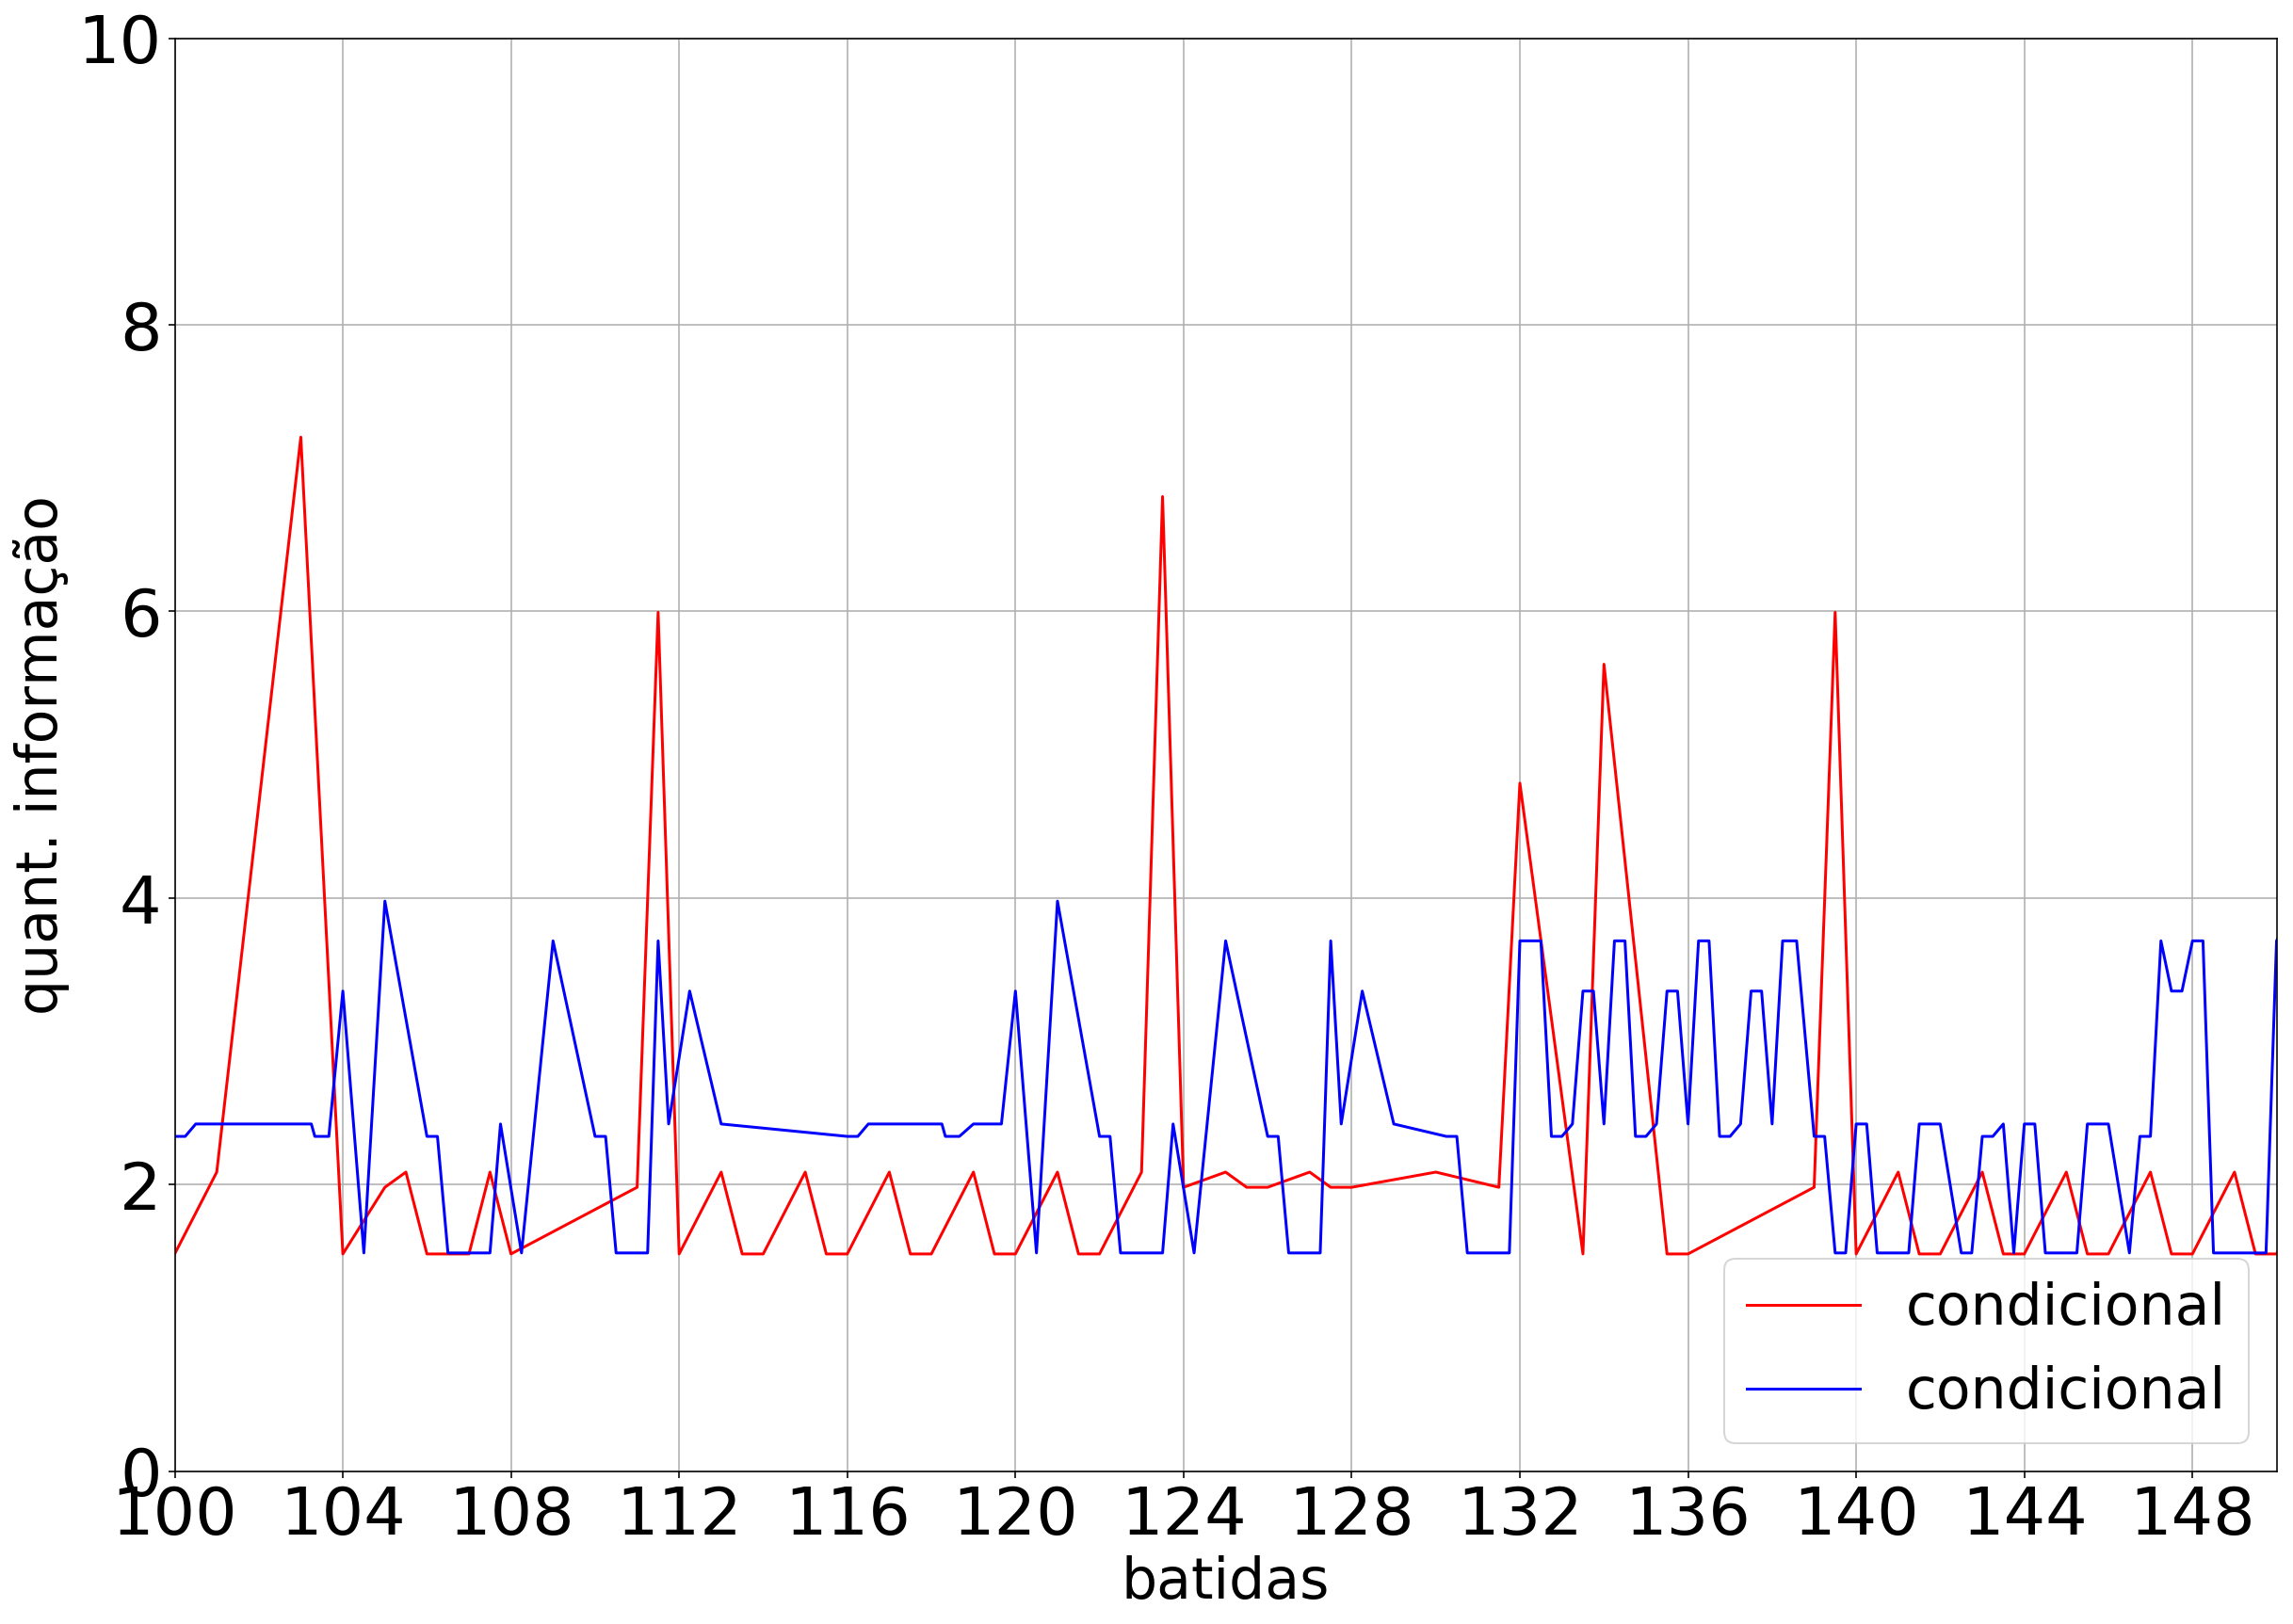

In [22]:
#duas

bach = s('mozart_40')
despacito = s('despacito')
x = t(bach[0])
x2 = t(despacito[0])
# print(x)
key = bach.analyze('key')
tonic = key.tonic.name
mode = key.mode

p = Probability()
p.addSong(bach)
p2 = Probability()
p2.addSong(despacito)

h = entropy.calculate(bach[0], p, tonic, mode)
h2 = entropy.calculate(despacito[0], p2, tonic, mode)

min_x = 100
max_x = 150

points = len(x)
font_size = 30

plt.figure(figsize=(20, 14))
plt.xlabel('batidas', fontsize = font_size)
plt.ylabel('quant. informação', fontsize = font_size)
# plt.plot(x[:points], h[util.NOTE][0][:points], label='notas individuais')
plt.plot(x[:points], h[util.DELTA][1][:points], color='red', label='condicional')
plt.plot(x2[:points], h2[util.DELTA][1][:points], color='blue', label='condicional')
# plt.plot(x[:points], h[util.DELTA][1][:points], color='green', label='distância')
# plt.plot(x[:200], h[util.DURATION][:200], color='green', label='duração')
plt.legend(fontsize = font_size, loc='lower right')

plt.axis((min_x, max_x,0, 10))
ax = plt.gca()                                        
minor_ticks = np.arange(min_x, max_x, 4)                                                    
ax.set_xticks(minor_ticks)
plt.tick_params(axis='both', which='major', labelsize=35)
ax.grid(which='both') 
# ax.grid(markevery=7)
# plt.show()
plt.savefig('bach.pdf')
